In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path  = "/kaggle/input/phishingemails/Phishing_Email.csv"
df = pd.read_csv(path)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

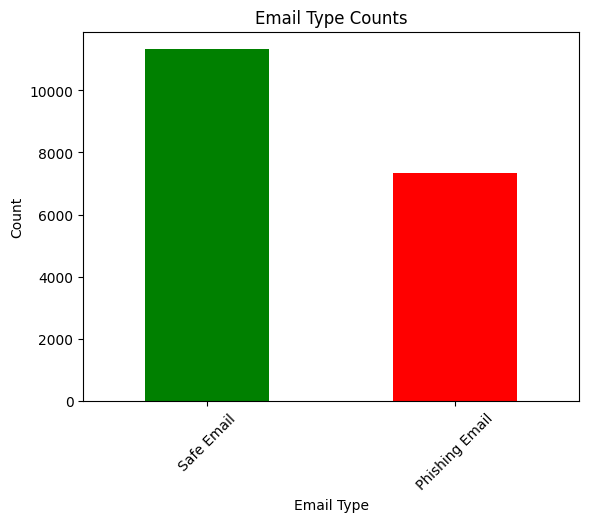

In [4]:
# Assuming 'df' is your DataFrame and 'Email Type' is the column of interest
email_type_counts = df['Email Type'].value_counts()

# Create a color palette
palette = sns.color_palette("hsv", len(email_type_counts))
colors = ['green' if i % 2 == 0 else 'red' for i in range(len(email_type_counts))]
# Plot
email_type_counts.plot(kind='bar', color=colors)
plt.title('Email Type Counts')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.show()

In [5]:
df.columns

Index(['Email Text', 'Email Type'], dtype='object')

In [6]:
df.isna().sum()

Email Text    16
Email Type     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Email Text    0
Email Type    0
dtype: int64

In [9]:
df["Email Type"] = df["Email Type"].replace({"Safe Email" : 0, "Phishing Email" : 1})

In [10]:
df[df['Email Text'].str.contains("http")]['Email Text'].iloc[0]

'\nHello I am your hot lil horny toy.\n    I am the one you dream About,\n    I am a very open minded person,\n    Love to talk about and any subject.\n    Fantasy is my way of life, \n    Ultimate in sex play.     Ummmmmmmmmmmmmm\n     I am Wet and ready for you.     It is not your looks but your imagination that matters most,\n     With My sexy voice I can make your dream come true...\n  \n     Hurry Up! call me let me Cummmmm for you..........................\nTOLL-FREE:             1-877-451-TEEN (1-877-451-8336)For phone billing:     1-900-993-2582\n-- \n_______________________________________________\nSign-up for your own FREE Personalized E-mail at Mail.com\nhttp://www.mail.com/?sr=signup'

In [11]:
spam_emails = df[df['Email Type'] == 1]['Email Text']

# Combine all spam emails into a single string
text = " ".join(email for email in spam_emails)

# Create a word cloud object
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)

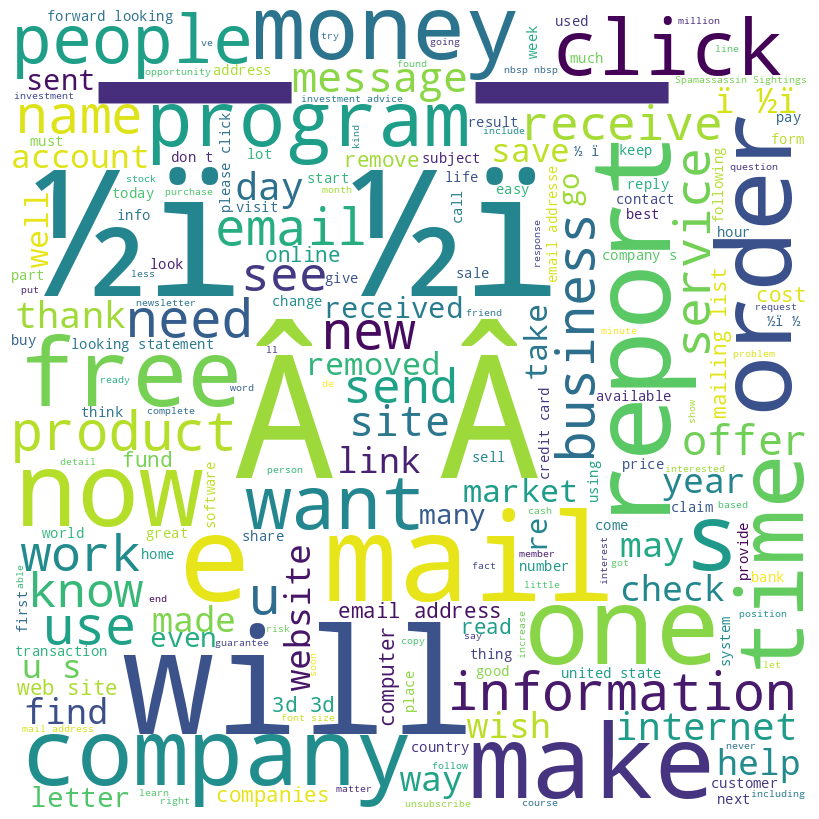

In [12]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()

In [13]:
X = df["Email Text"].values
y = df["Email Type"].values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [16]:
clfs = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
              ExtraTreeClassifier(),
             GradientBoostingClassifier(), AdaBoostClassifier(), MultinomialNB(), XGBClassifier(), SGDClassifier(), MLPClassifier()]

names = ['Logistic_Regression', 'DecisionTree', 'Random_Forest',
         'ExtraTree', 'GradientBoost', 'Adaboost', "NaiveBayes", "XGBoost", "SGD","MLP"]

In [17]:
model_dict_desc = {}
for name, clf in tqdm(zip(names, clfs)):
    classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier", clf)])
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    model_dict_desc[name] = [recall_score(y_test, y_pred),
                             precision_score(y_test, y_pred), 
                             accuracy_score(y_test, y_pred)]

9it [05:04, 30.33s/it]/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
10it [22:31, 135.11s/it]


In [18]:
model_df_desc = pd.DataFrame(model_dict_desc, index = ['recall_score', 'precision_score', 'accuracy_score',]).T
model_df_desc = model_df_desc.sort_values(by=['accuracy_score','recall_score','precision_score'], ascending=False)
model_df_desc

,recall_score,precision_score,accuracy_score
MLP,0.983528,0.959170,0.977193
SGD,0.984900,0.949074,0.973437
Logistic_Regression,0.968428,0.946345,0.966193
XGBoost,0.967056,0.934970,0.960826
Random_Forest,0.937543,0.956583,0.958948
GradientBoost,0.913521,0.910397,0.931044
Adaboost,0.920384,0.888079,0.923531
NaiveBayes,0.795470,0.965029,0.908774
DecisionTree,0.880577,0.875171,0.904213
ExtraTree,0.831160,0.811119,0.858331


# Apply Transformer based Bert Models

In [19]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from tqdm import tqdm

In [20]:

# Function to calculate accuracy
def calculate_accuracy(preds, labels):
    flat_preds = np.argmax(preds, axis=1).flatten()
    flat_labels = labels.flatten()
    return np.sum(flat_preds == flat_labels) / len(flat_labels)

class EmailDataset(Dataset):
    def __init__(self, emails, labels, tokenizer, max_len):
        self.emails = emails
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.emails)

    def __getitem__(self, item):
        email = str(self.emails[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            email,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,  # Ensure that sequences longer than MAX_LEN are truncated
            return_token_type_ids=False,
            padding='max_length',  # Pad to max_length
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [21]:
# Parameters
MAX_LEN = 128
BATCH_SIZE = 128
EPOCHS = 5

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [22]:
path  = "/kaggle/input/phishingemails/Phishing_Email.csv"
df_1 = pd.read_csv(path)
df_1.drop(["Unnamed: 0"], axis=1, inplace=True)
df_1.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [23]:
df_1['Email Text'].str.len().max()

17036692.0

In [24]:
df_1["Email Type"] = df_1["Email Type"].replace({"Safe Email" : 0, "Phishing Email" : 1})

In [25]:
# Splitting data into train and validation sets
df_train, df_val = train_test_split(df_1, test_size=0.2)

In [26]:
df_train.head()

,Email Text,Email Type
18373,"> help me out here.\n > You around?Barely, bu...",0
16720,empty,0
8358,help is on the way diann be the best you can b...,1
14246,fulbright announcement : please post / dissemi...,0
11941,"\nÂ \nDear \n Homeowner,Â ...",1


In [27]:
# Create data loaders
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = EmailDataset(
        emails=df['Email Text'].to_numpy(),
        labels=df['Email Type'].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

In [28]:
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)

In [29]:
# Load BERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
# import torch
# import gc

# # Clear up all CUDA memory (optional, as PyTorch does this automatically in most cases)
# torch.cuda.empty_cache()

# # Call the garbage collector
# gc.collect()

# # Check GPU memory usage (optional, for verification)
# print(torch.cuda.memory_summary())

In [31]:
# Training
optimizer = AdamW(model.parameters(), lr=2e-5)
training_loss = []
validation_loss = []

training_accuracy = []
validation_accuracy = []

for epoch in tqdm(range(EPOCHS)):
    model.train()
    total_loss, total_accuracy = 0, 0

    for batch in (train_data_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        total_accuracy += calculate_accuracy(logits, label_ids)

    avg_train_loss = total_loss / len(train_data_loader)
    avg_train_acc = total_accuracy / len(train_data_loader)
    training_loss.append(avg_train_loss)
    training_accuracy.append(avg_train_acc)
    print(f"Training loss: {avg_train_loss}, Accuracy: {avg_train_acc}")

    # Validation loop
    model.eval()
    total_loss, total_accuracy = 0, 0

    for batch in val_data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        total_accuracy += calculate_accuracy(logits, label_ids)

    avg_val_loss = total_loss / len(val_data_loader)
    avg_val_acc = total_accuracy / len(val_data_loader)
    print(f"Validation loss: {avg_val_loss}, Accuracy: {avg_val_acc}")
    validation_loss.append(avg_val_loss)
    validation_accuracy.append(avg_val_acc)

    torch.save(model.state_dict(), 'bert_model.bin')


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]

Training loss: 0.20767789182818344, Accuracy: 0.9155240978157645
Validation loss: 0.07066983145972093, Accuracy: 0.9723958333333333


 20%|██        | 1/5 [07:44<30:57, 464.39s/it]

Training loss: 0.05505693712645871, Accuracy: 0.9770076566951567
Validation loss: 0.06558728776872158, Accuracy: 0.9747395833333333


 40%|████      | 2/5 [15:35<23:24, 468.09s/it]

Training loss: 0.03587682321508471, Accuracy: 0.9841227445394113
Validation loss: 0.06751796288105348, Accuracy: 0.9786458333333333


 60%|██████    | 3/5 [23:22<15:35, 467.84s/it]

Training loss: 0.027887755523348212, Accuracy: 0.9859256291547959
Validation loss: 0.10549031378080448, Accuracy: 0.9653356481481481


 80%|████████  | 4/5 [31:10<07:47, 467.77s/it]

Training loss: 0.027741597471838325, Accuracy: 0.9853914411206078
Validation loss: 0.06006808076053858, Accuracy: 0.9796875


100%|██████████| 5/5 [38:59<00:00, 467.99s/it]


# Explanation 

Libraries and Frameworks: The script uses PyTorch, a popular deep learning framework, and the transformers library from Hugging Face for working with pre-trained models like BERT (Bidirectional Encoder Representations from Transformers).

Custom Dataset Class: The script defines a custom EmailDataset class for handling email data. It tokenizes the emails and prepares them for input into the BERT model.

BERT Tokenizer and Model: The BERT model (bert-base-uncased) and tokenizer are used for encoding the emails. BERT is a state-of-the-art model for natural language processing tasks.

Data Preprocessing: The script reads a CSV file containing email data, preprocesses it by dropping unnecessary columns, and converts email type labels into numerical form (0 for safe, 1 for phishing).

Data Loading and Splitting: The dataset is split into training and validation sets, and data loaders are created to handle batching and loading of data during model training.

Model Training: The training loop involves feeding batches of data to the BERT model, calculating the loss, and updating the model's weights. The script uses the AdamW optimizer and tracks metrics like training and validation loss and accuracy.

Accuracy Calculation: A custom calculate_accuracy function is provided to compute the accuracy of the model's predictions.

Inference Function: A function predict is defined to classify new emails using the trained model. It tokenizes the email, feeds it to the model, and interprets the output as 'Spam' or 'Not Spam'.

Sample Predictions and Explanation: The script demonstrates how to use the predict and LIME functions on sample emails from the dataset.

Model Saving: The trained BERT model's state is saved to a file, allowing it to be loaded and used later for inference without needing to retrain.



# Inference

In [32]:
df_1.iloc[5].values

array(['global risk management operations sally congratulations on your new role . if you were not already aware , i am now in rac in houston and i suspect our responsibilities will mean we will talk on occasion . i look forward to that . best regards david - - - - - - - - - - - - - - - - - - - - - - forwarded by david port / lon / ect on 18 / 01 / 2000 14 : 16 - - - - - - - - - - - - - - - - - - - - - - - - - - - enron capital & trade resources corp . from : rick causey @ enron 18 / 01 / 2000 00 : 04 sent by : enron announcements @ enron to : all enron worldwide cc : subject : global risk management operations recognizing enron \x01 , s increasing worldwide presence in the wholesale energy business and the need to insure outstanding internal controls for all of our risk management activities , regardless of location , a global risk management operations function has been created under the direction of sally w . beck , vice president . in this role , sally will report to rick causey , 

In [33]:
df_1.iloc[100].values

array(['the permanent fix to penis enlargement limited time offer : add atleast 3 inches or get your money back - - - - > click here to learn more no thanks',
       1], dtype=object)

In [34]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.load_state_dict(torch.load('/kaggle/working/bert_model.bin', map_location=torch.device('cpu')))
model.eval()

# Inference function
def predict(email, tokenizer, model):
    inputs = tokenizer.encode_plus(
        email,
        add_special_tokens=True,
        max_length=128,
        truncation=True,
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    prediction = torch.argmax(outputs.logits, dim=1).item()
    return 'Spam' if prediction == 1 else 'Not Spam'


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
test_email = "global risk management operations sally congratulations on your new role . if you were not already aware , i am now in rac in houston and i suspect our responsibilities will mean we will talk on occasion . i look forward to that . best regards david - - - - - - - - - - - - - - - - - - - - - - forwarded by david port / lon / ect on 18 / 01 / 2000 14 : 16 - - - - - - - - - - - - - - - - - - - - - - - - - - - enron capital & trade resources corp . from : rick causey @ enron 18 / 01 / 2000 00 : 04 sent by : enron announcements @ enron to : all enron worldwide cc : subject : global risk management operations recognizing enron \x01 , s increasing worldwide presence in the wholesale energy business and the need to insure outstanding internal controls for all of our risk management activities , regardless of location , a global risk management operations function has been created under the direction of sally w . beck , vice president . in this role , sally will report to rick causey , executive vice president and chief accounting officer . sally \x01 , s responsibilities with regard to global risk management operations will mirror those of other recently created enron global functions . in this role , sally will work closely with all enron geographic regions and wholesale companies to insure that each entity receives individualized regional support while also focusing on the following global responsibilities : 1 . enhance communication among risk management operations professionals . 2 . assure the proliferation of best operational practices around the globe . 3 . facilitate the allocation of human resources . 4 . provide training for risk management operations personnel . 5 . coordinate user requirements for shared operational systems . 6 . oversee the creation of a global internal control audit plan for risk management activities . 7 . establish procedures for opening new risk management operations offices and create key benchmarks for measuring on - going risk controls . each regional operations team will continue its direct reporting relationship within its business unit , and will collaborate with sally in the delivery of these critical items . the houston - based risk management operations team under sue frusco \x01 , s leadership , which currently supports risk management activities for south america and australia , will also report directly to sally . sally retains her role as vice president of energy operations for enron north america , reporting to the ena office of the chairman . she has been in her current role over energy operations since 1997 , where she manages risk consolidation and reporting , risk management administration , physical product delivery , confirmations and cash management for ena \x01 , s physical commodity trading , energy derivatives trading and financial products trading . sally has been with enron since 1992 , when she joined the company as a manager in global credit . prior to joining enron , sally had four years experience as a commercial banker and spent seven years as a registered securities principal with a regional investment banking firm . she also owned and managed a retail business for several years . please join me in supporting sally in this additional coordination role for global risk management operations ."

In [36]:
# Test the function with a new email
print(predict(test_email, tokenizer, model))

Not Spam
